# Hydrodome Simulation Plotting Example

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from scipy.ndimage import gaussian_filter

## theoretical angular distributions

## plot simulation results

filename Base: base_exampleInput
total timesteps: 1001


<ipython-input-9-2c3725e284dd>:90: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax3.plot(binDep,'k.',markerSize = 20)


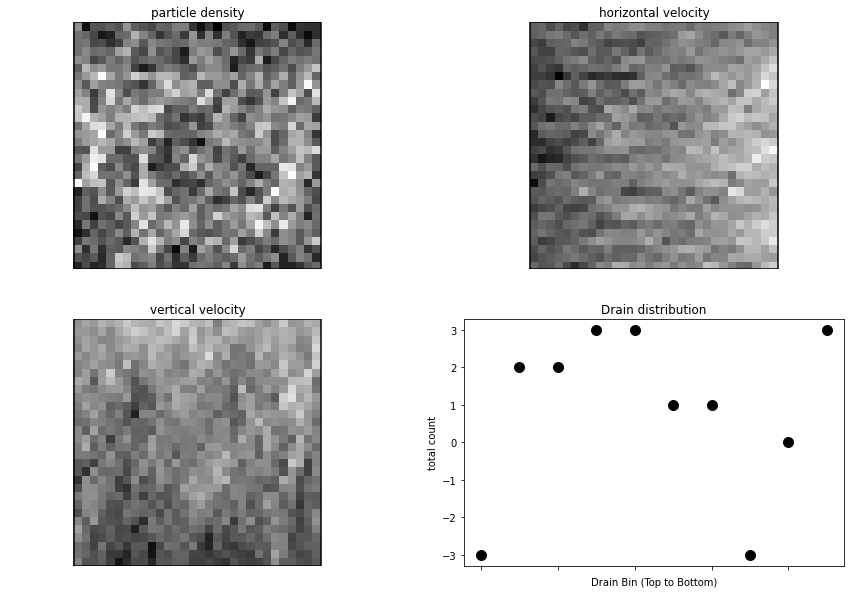

In [9]:
fnameBases = ['base_exampleInput'] #list of base name of simulations
Nsims = 1 #number of simulations
blur = 0 #performs a gaussian blur

symm = False #symmetrizes the output

binnedEdges = np.arange(1,11)

angleDeps = np.zeros(((7,60)))
for fnameNum,fnameBase in enumerate(fnameBases):
    print('filename Base: '+fnameBase)
    
    fig = plt.figure(figsize = (15,10))
    ax0 = fig.add_subplot(221)
    ax1 = fig.add_subplot(222)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(224)

    #calculate the angle dependence and sum up the densities
    for i in range(Nsims):
        fname = fnameBase
        with np.load('./data/'+fname+'/'+fname+'_%03d.npz'%i) as mat:
            if i == 0:
                rho = mat['Erho'].copy()
                vX = mat['Px'].copy()
                vY = mat['Py'].copy()
                
                # change asorbtion/ injection counting
                binDep = mat['Nabsorbed'][binnedEdges] - mat['Ninjected'][binnedEdges]
                print('total timesteps: %d'%mat['timeCount'])
                #load in the 2D histogram axes from simulation            
                histX = mat['histX']
                histY = mat['histY']
                borderX = mat['borderX']
                borderY = mat['borderY']
                edgeStyle = mat['edgeStyle']
                f = -2 
            else:
                rho += mat['Erho']
                vX  += mat['Px']
                vY  += mat['Py']
                binDep +=  mat['Nabsorbed'][binnedEdges] - mat['Ninjected'][binnedEdges]
 
    # inserts NaN for fictisious edges, so that they are not plotted
    for edge_idx in np.arange(len(edgeStyle)):
        idx_dif = len(borderX)-len(edgeStyle)  # difference between '' which changes with additions of NaNs
        edge = edgeStyle[edge_idx]
        if edge == f:
            borderX = np.insert(borderX,edge_idx + idx_dif, np.NaN)
            borderY = np.insert(borderY,edge_idx + idx_dif, np.NaN)
                
            
    #ax0 plots the particle density
    rhoPlot = gaussian_filter(rho.T,blur)
    m1 = np.median(rho)
    if symm:
        rhoPlot+=rhoPlot[:,::-1]
        rhoPlot/=2.
    ax0.pcolormesh(histX,histY,rhoPlot,cmap = 'gray')#, vmin = 0.99*m1,vmax = 1.02*m1)
    ax0.axis('off')
    ax0.plot(borderX,borderY,'k')
    ax0.axis('equal')
    
    #ax1 plots the horizontal velocity distribution
    vXplot = gaussian_filter(vX.T,blur)
    m1 = np.max(np.abs(vXplot))
    if symm:
        vXplot-=vXplot[:,::-1]
        vXplot/=2.
    ax1.pcolormesh(histX,histY,vXplot,cmap='gray', vmin=-m1, vmax=m1)
    ax1.axis('off')
    ax1.plot(borderX,borderY,'k')
    ax1.axis('equal')
    
    #ax2 plots the vertical velocity distribution
    vYplot = gaussian_filter(vY.T,blur)
    m1 = np.max(np.abs(vXplot))
    if symm:
        vYplot+=vYplot[:,::-1]
        vYplot/=2.
    ax2.pcolormesh(histX,histY,vYplot,cmap='gray', vmin=-m1, vmax=m1)
    ax2.axis('off')
    ax2.plot(borderX,borderY,'k')
    ax2.axis('equal')
    
    #ax3 plots the angular distribution
    if symm:
        angleDep+=angleDep[::-1]
        angleDep/=2.
    ax3.plot(binDep,'k.',markerSize = 20)
    ax3.set_xlabel('Drain Bin (Top to Bottom)')
    ax3.set_ylabel('total count')
    ax3.set_xticklabels([])
    
    ax0.set_title('particle density')
    ax1.set_title('horizontal velocity')
    ax2.set_title('vertical velocity')
    ax3.set_title('Drain distribution')
    
    plt.show()

In [6]:
np.arange(1,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])